# Lab - Dane 2
## Wartości odstające
Odstające wartości często można zauważyć na histogramie.

In [1]:

import pandas as pd
import numpy as np

df = pd.read_csv("diamonds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

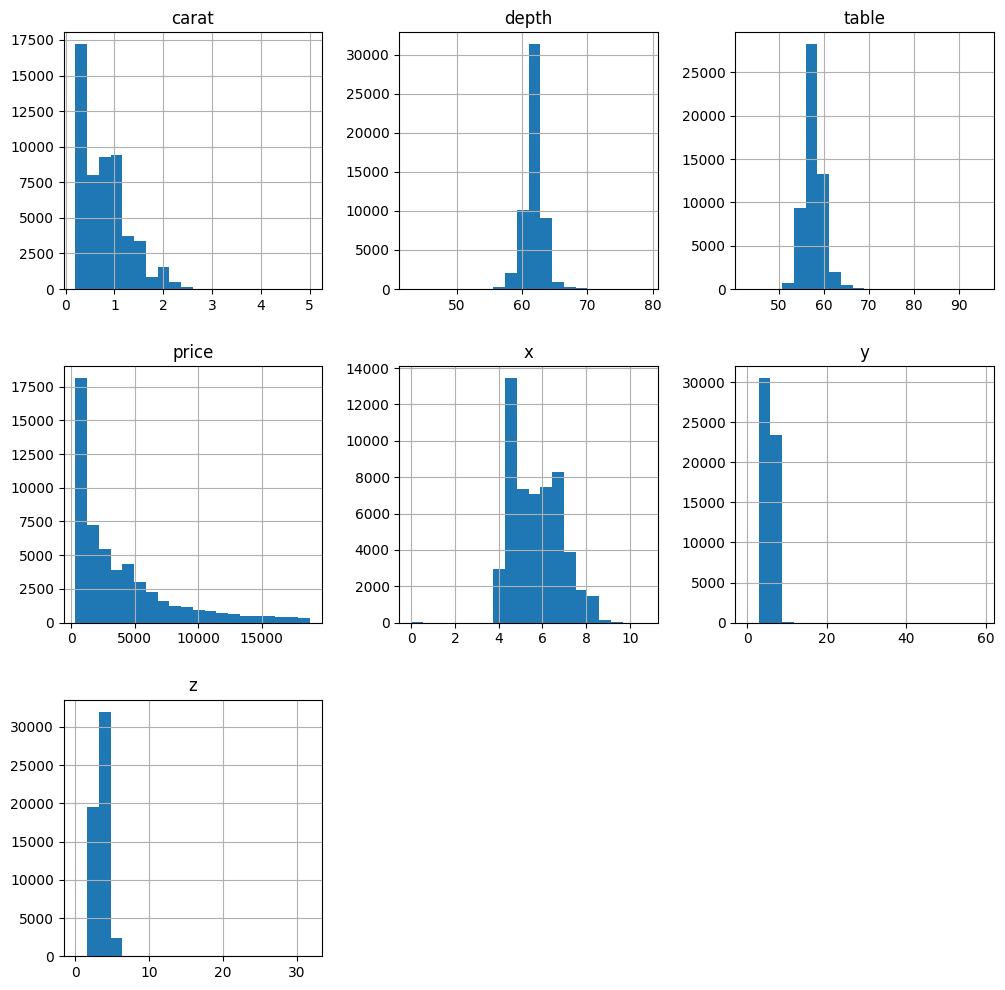

In [2]:
df.hist(figsize=(12, 12), bins=20)

Uwagę zwracają w szczególności zmienne `y` i `z`. 

(0.0, 3.0)

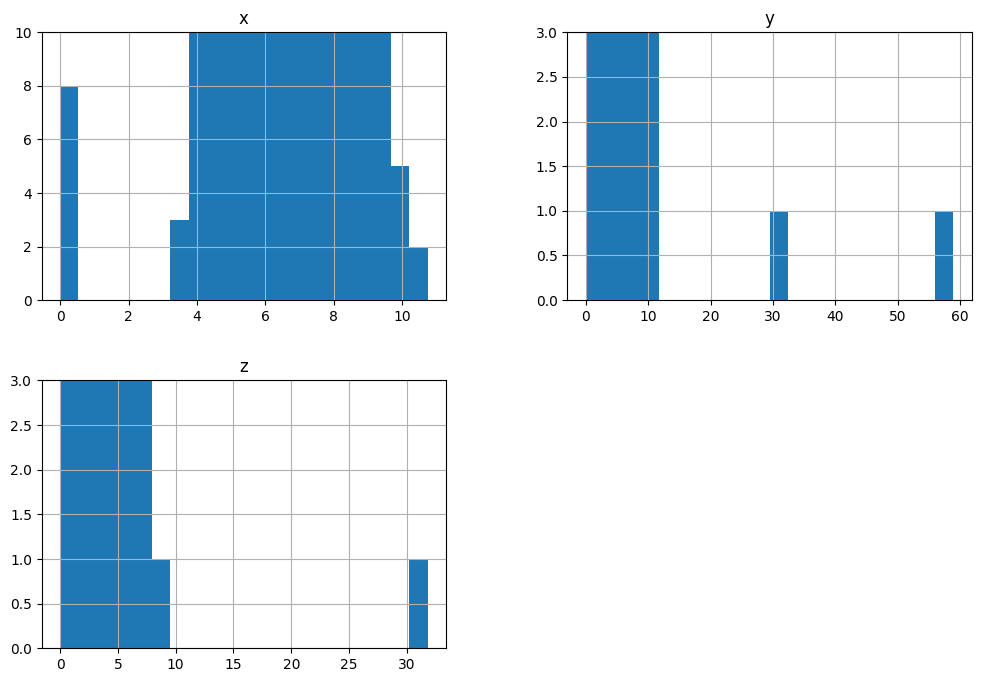

In [3]:
((axx, axy), (axz, _)) = df[["x", "y", "z"]].hist(figsize=(12, 8), bins=20)
axx.set_ylim(0, 10)
axy.set_ylim(0, 3)
axz.set_ylim(0, 3)

Text(0, 0.5, 'z')

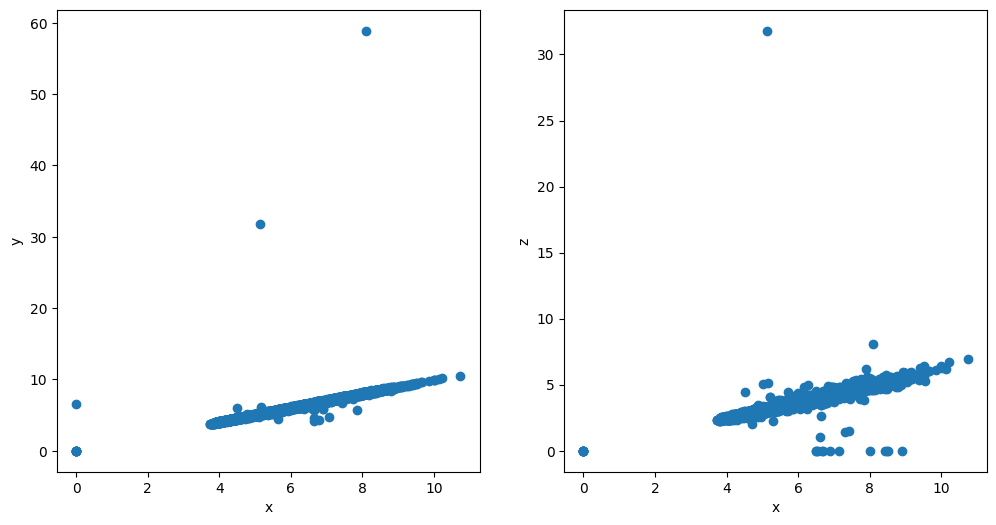

In [4]:

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter("x", "y", data=df)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.scatter("x", "z", data=df)
ax2.set_xlabel("x")
ax2.set_ylabel("z")

Wartości odstające można także wykryć licząc $Z$-score: $$Z = \frac{x - \mu}{\sigma}.$$

Za odstające uznaje się zwykle wartości z $|Z|>3$.

In [5]:
y_zscore = (df.y - df.y.mean())/df.y.std()
y_zscore.abs().sort_values().tail(10)

27415     4.207450
15951     5.020884
49557     5.020884
24520     5.020884
27429     5.020884
26243     5.020884
11963     5.020884
49556     5.020884
49189    22.821717
24067    46.549216
Name: y, dtype: float64

In [6]:
z_zscore = (df.z - df.z.mean())/df.z.std()
z_zscore.abs().sort_values().tail(10)

11963     5.014510
11182     5.014510
4791      5.014510
10167     5.014510
24520     5.014510
51506     5.014510
27429     5.014510
49557     5.014510
24067     6.406793
48410    40.047205
Name: z, dtype: float64

Wartości znajdujące się 22, 40 i 46 odchyleń standardowych od średniej to prawdopodobnie błędy w danych, które można oznaczyć jako `NA`.

In [7]:
df.loc[df.y > 20, "y"] = np.nan
df.loc[df.z > 20, "z"] = np.nan

Za błędne można uznać także wartości 0 w wymiarach `x`, `y` i `z`

In [8]:
df2 = df.replace({"x": 0., "y": 0., "z": 0.}, np.nan)

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

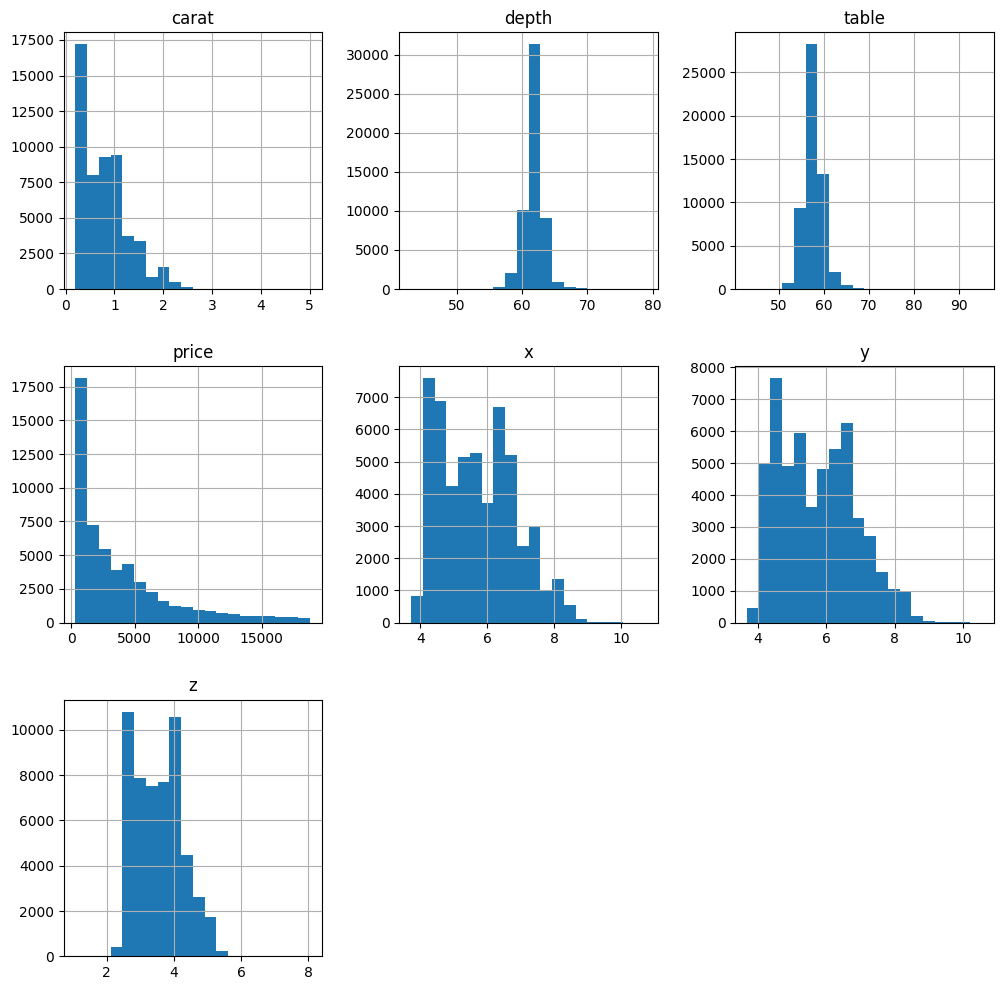

In [9]:
df2.hist(figsize=(12, 12), bins=20)

## Wartości brakujące
Brakujące wartości w pandas zapisywane są jako `pd.NA` lub `np.nan`.
 - Wykrywanie brakujących:`df.info()`, `df.isna()`.
 - Usuwanie (wiersze lub kolumny): `df.dropna(axis=0)`, `df.dropna(axis=1)`.
 - Zastępowanie podaną wartością: `df.fillna()`.
### Przykłady

In [10]:
import pandas as pd
housing = pd.read_csv("housing.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing_na_rows = housing.isna().any(axis=1)
housing[housing_na_rows]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [12]:
housing1 = housing.dropna(axis=0)
housing1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
housing2 = housing.dropna(axis=1)
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [14]:
housing3 = housing.fillna({"total_bedrooms": housing["total_bedrooms"].mean()})
housing3[housing_na_rows].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,537.870553,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,537.870553,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,537.870553,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,537.870553,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,537.870553,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,537.870553,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,537.870553,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,537.870553,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,537.870553,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,537.870553,1339.0,499.0,6.7061,322300.0,NEAR BAY


## Zadania
1. Sprawdź, czy pozostałe kolumny zbioru `diamonds` mają wartości odstające. 
2. Usuń obserwacje zawierające wartości odstające ze zbioru w pilku `glass.csv`. 
    * Opcja 1: usuń wszystkie obserwacje zawierające wartości z $|Z| > 3$. Wskazówka: aby obliczyć $Z$-score dla wielu kolumn numerycznych jednocześnie można zastsować metodę `apply`.
    * Opcja 2: usuń wszystkie obserwacje, w których co najmniej dwie wartości są poza zakresem $[Q_1 - 1.5(Q_3 - Q_1), Q_3 + 1.5(Q_3 - Q_1)]$

3. Zbiór danych w pliku `censusData-with3errors` zawiera trzy celowo dodane błędy. Znajdź je i zastąp wartością `pd.NA`. 
4. Zbiór danych w z Zadania 3. zawiera także brakujące wartości. 
    - Brakujące wartości oznaczone są w pliku jako `?`. Sprawdź w dokumentacji `read_csv()`, jaki parametr należy ustawić, aby wczytać je jako wartości `NA`. Uwaga: aby poprawnie wczytać plik należy podać parametr (`skipinitialspace=True`).
    - Znajdż wiersze z największą liczbą brakujących wartości i usuń je. Wskazówka: brakujące wartości w wierszach można zliczyć `df.isna().sum(axis=1)`. Przyda się też metoda `value_counts()`.
    - Sprawdź, które kolumny zawierają mniej niż 3% brakujących wartości. W tych kolumnach zastąp brakujące wartości najczęściej występującą wartością. Korzystaj z metod `fillna()`, `mode()`. Wskazówka: użyj `mode()[0]` aby otrzymać pojedynczą wartość.
    - Usuń pozostałe kolumny zawierające brakujące wartości.
5. Wczytaj dowolny zbiór danych z [repozytorium UCI](https://archive.ics.uci.edu/), a następnie:
    - Wizualizuj rozkłady zmiennych. Można zastosować np. histogramy, wykresy słupkowe, wykresy punktowe, pairplot, mapy korelacji, etc.
    - Sprawdź, czy w zbiorze znajdują się wartości brakujące lub odstające. Jeśli zbiór zawiera ewidentne błędy, oznacz je jako `NA`/`NaN`.

## Zadanie 1

In [15]:
diamonds = pd.read_csv("diamonds.csv")
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

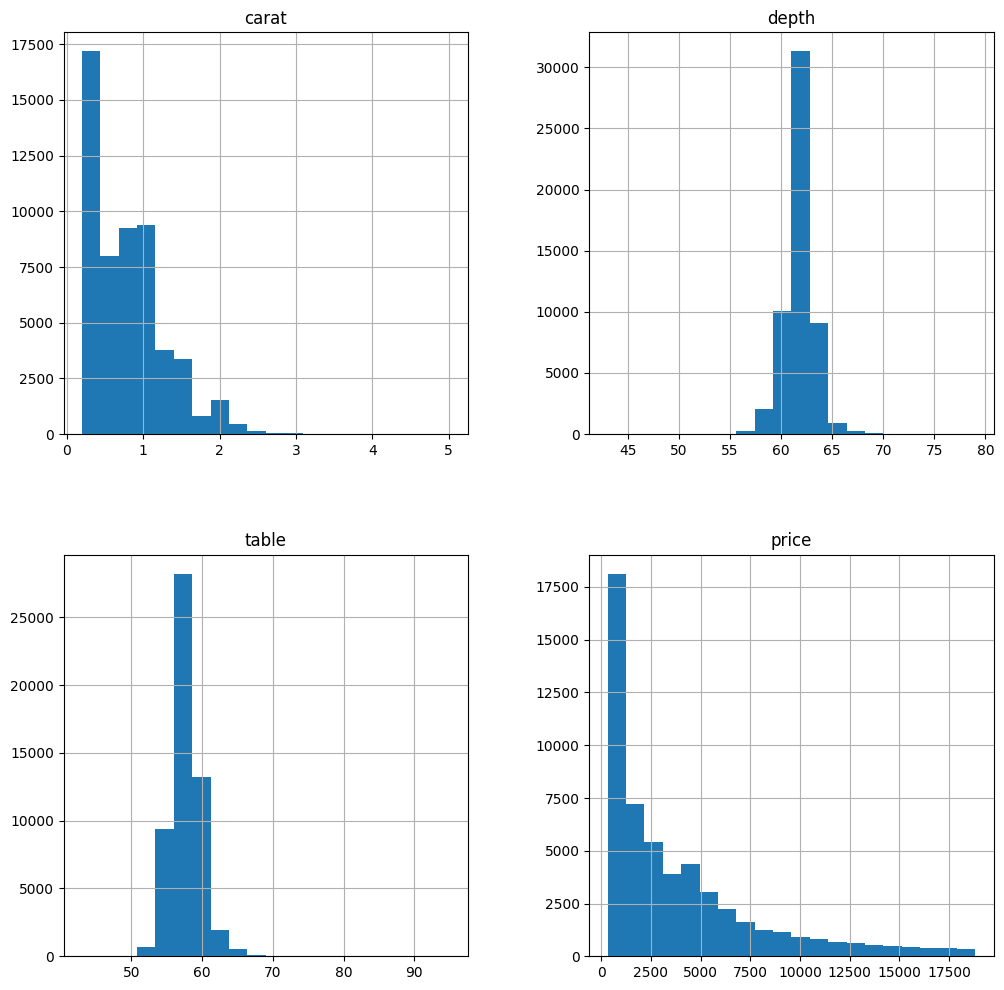

In [17]:
df[["carat", "depth", "table", "price"]].hist(figsize=(12, 12), bins = 20)

(0.0, 2500.0)

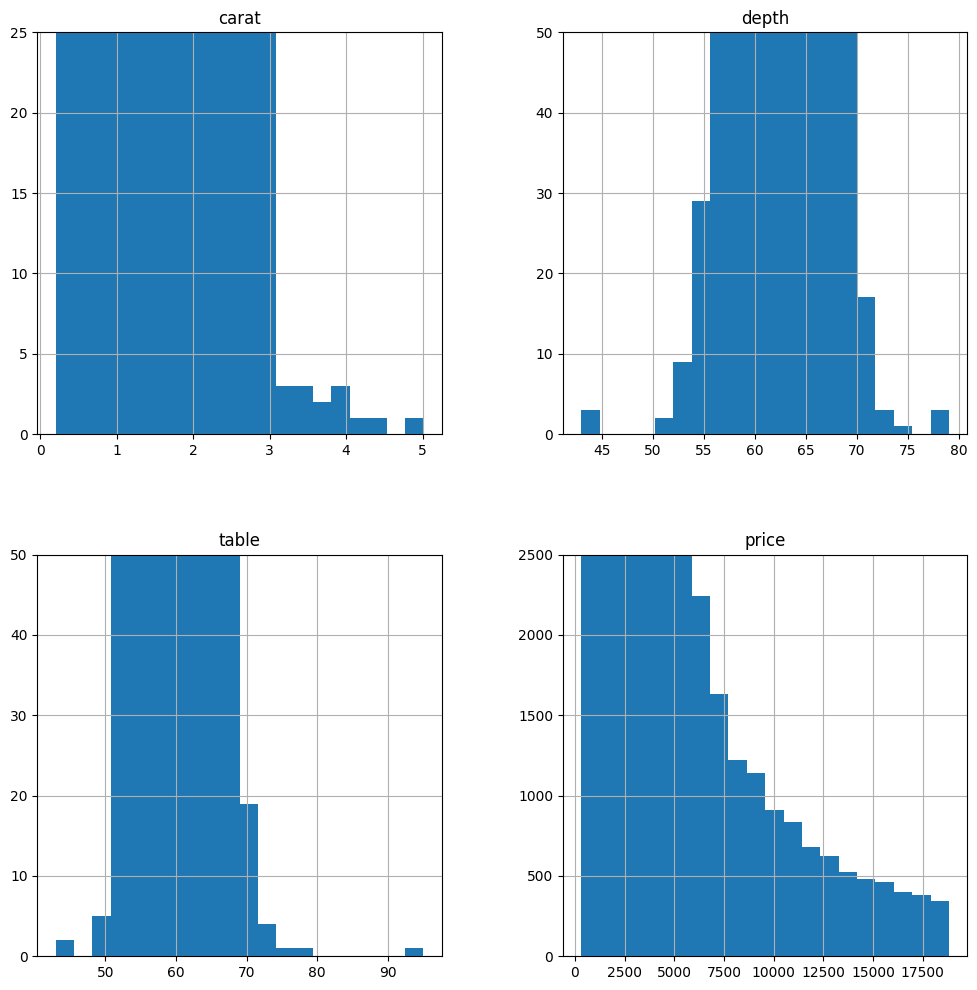

In [25]:
((carat, depth), (table, price)) = df[["carat", "depth", "table", "price"]].hist(figsize=(12, 12), bins = 20)
carat.set_ylim(0, 25)
depth.set_ylim(0, 50)
table.set_ylim(0, 50)
price.set_ylim(0, 2500)

Text(0, 0.5, 'price')

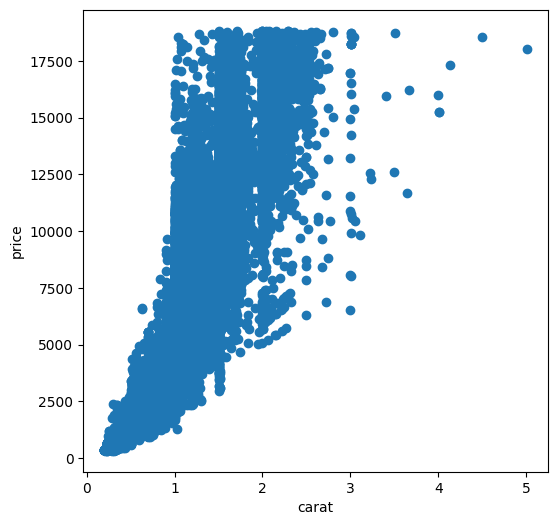

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter("carat", "price", data=diamonds)
ax.set_xlabel("carat")
ax.set_ylabel("price")

Text(0, 0.5, 'price')

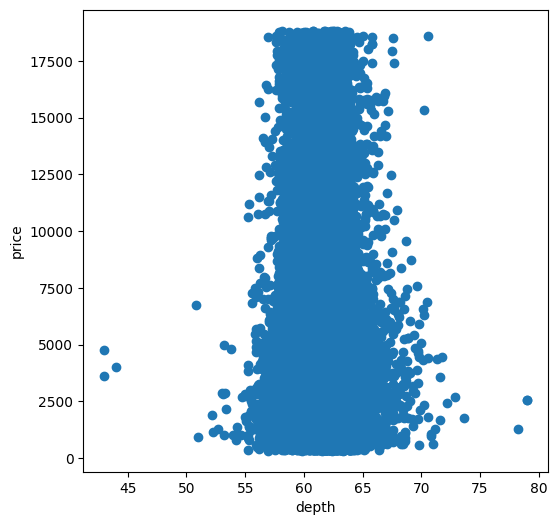

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter("depth", "price", data=diamonds)
ax.set_xlabel("depth")
ax.set_ylabel("price")

Text(0, 0.5, 'price')

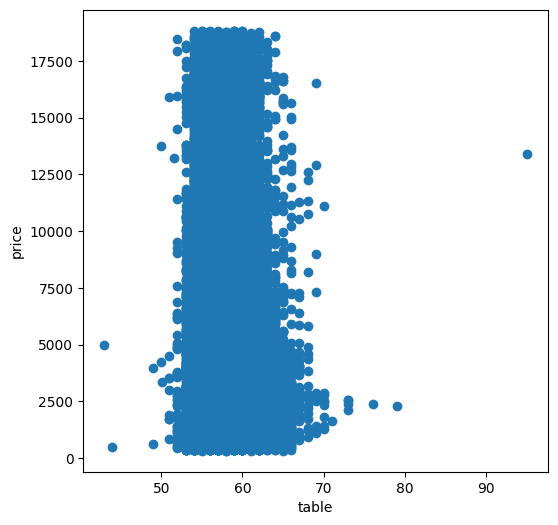

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter("table", "price", data=diamonds)
ax.set_xlabel("table")
ax.set_ylabel("price")

Text(0, 0.5, 'z')

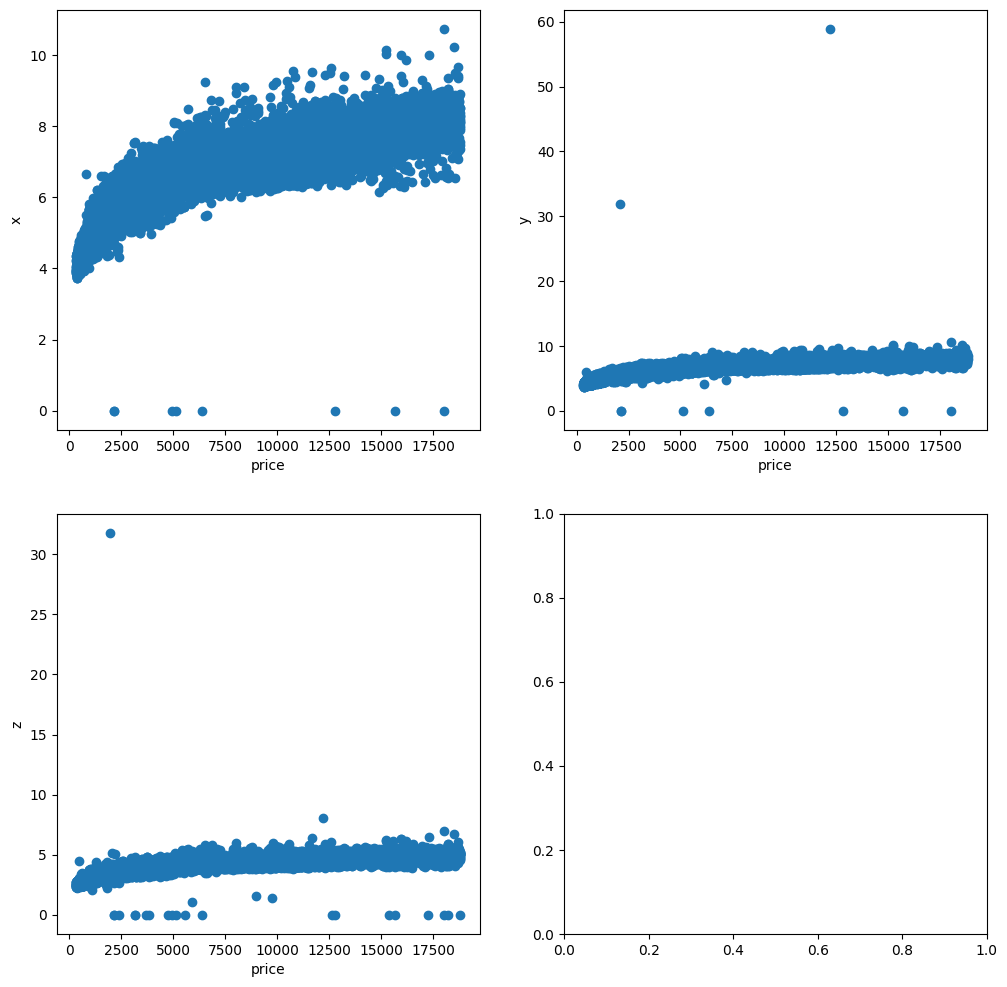

In [33]:
fig, ((ax1, ax2), (ax3, _)) = plt.subplots(2, 2, figsize=(12, 12))

ax1.scatter("price", "x", data=diamonds)
ax1.set_xlabel("price")
ax1.set_ylabel("x")

ax2.scatter("price", "y", data=diamonds)
ax2.set_xlabel("price")
ax2.set_ylabel("y")

ax3.scatter("price", "z", data=diamonds)
ax3.set_xlabel("price")
ax3.set_ylabel("z")

## Zadanie 2

In [71]:
glass = pd.read_csv("glass.csv")
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [72]:
glass1 = glass.copy()

In [73]:
pred1 = glass1.apply(lambda x: np.abs(
    (x - np.mean(x)) / np.std(x)
))
glass1 = glass1[pred1 <= 3].dropna(axis=0)
glass1.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [95]:
glass2 = glass.copy()

In [96]:
quant = glass2.apply(
    lambda x: x.quantile(0.75) - x.quantile(0.25)
).abs() * 1.5

pred = glass2.apply(
    lambda x: (x < x.quantile(0.25) - quant[x.name]) | (x > x.quantile(0.75) + quant[x.name])
)
glass2 = glass2[(pred.sum(axis=1) < 2)]
glass2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6
181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6
182,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.0,0.0,6


## Zadanie 3

In [100]:
census = pd.read_csv("censusData-with3errors.csv")
census.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [101]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

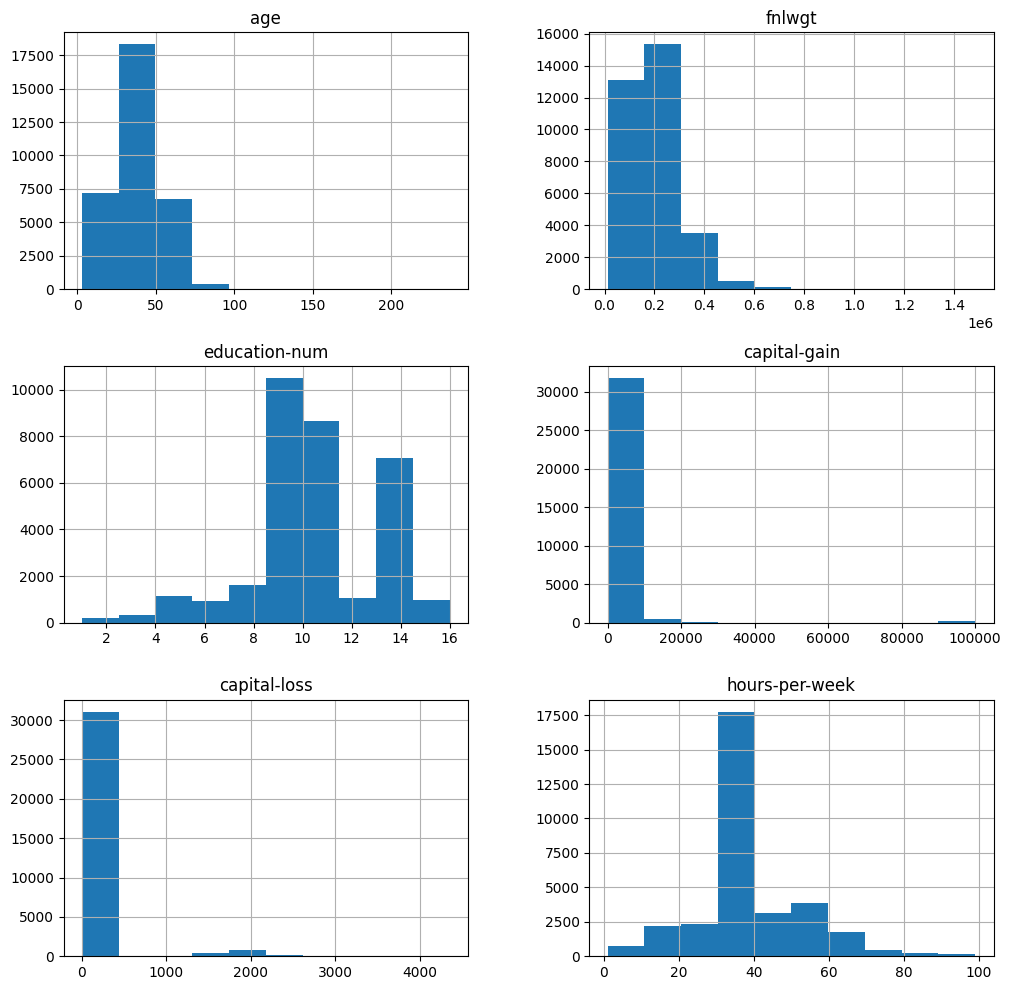

In [104]:
census.hist(figsize=(12, 12))

Text(0.5, 0, 'age')

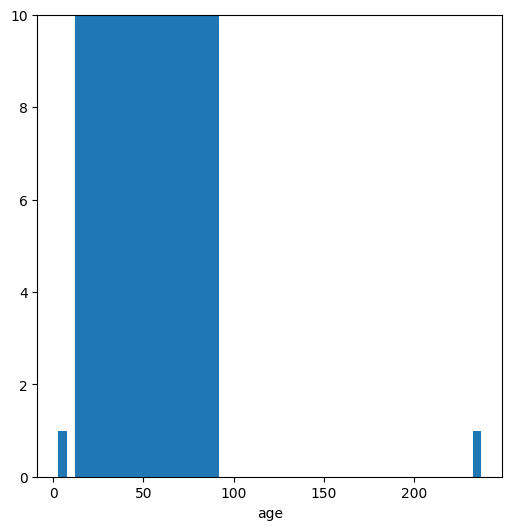

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist(x = "age", data=census, bins=50)
ax.set_ybound(0, 10)
ax.set_xlabel("age")

In [121]:
census["age"].describe()

count    32561.000000
mean        38.586745
std         13.686097
min          3.000000
25%         28.000000
50%         37.000000
75%         48.000000
max        237.000000
Name: age, dtype: float64

In [131]:
census.loc[census[census.age == 3].age.index, "age"] = pd.NA

In [132]:
census.loc[census[census.age == 237].age.index, "age"] = pd.NA

Text(0.5, 0, 'age')

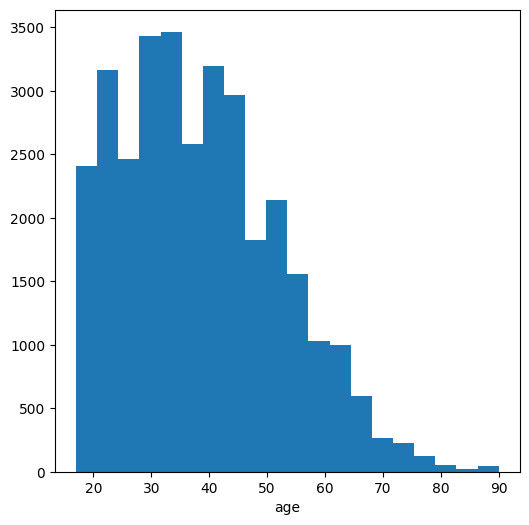

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist(x = "age", data=census, bins=20)
# ax.set_ybound(0, 10)
ax.set_xlabel("age")

In [137]:
census.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
census_cat = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

In [ ]:
for col in census_cat:
    print(f"{col}: {census[col].unique()}")

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex: [' Male' '

In [166]:
census.where(census["native-country"] == 'Unimed-States')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
census.loc[census["native-country"] == 'Unimed-States', :] = np.nan

In [165]:
for col in census_cat:
    print(f"{col}: {census[col].unique()}")

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num: [13.  9.  7. 14.  5. 10. 12. 11.  4. 16. 15.  3.  6.  2.  1.  8.]
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

## Zadanie 4

In [176]:
census = pd.read_csv("censusData-with3errors.csv", skipinitialspace=True, na_values=["?"])
census.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [177]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [195]:
census.isna().sum(axis=1).value_counts()

0    30162
2     1809
1      563
3       27
Name: count, dtype: int64

In [196]:
census = census[(census.isna().sum(axis=1) <= 2)]

In [197]:
census.isna().sum(axis=1).value_counts()

0    30162
2     1809
1      563
Name: count, dtype: int64

In [198]:
round(census.isna().sum(axis=0) / census.shape[0], 2) * 100

age               0.0
workclass         6.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        6.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    2.0
income            0.0
dtype: float64

In [199]:
census = census.fillna({"workclass": census["workclass"].mode()[0], "occupation": census["occupation"].mode()[0]})

In [200]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32534 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32534 non-null  int64 
 1   workclass       32534 non-null  object
 2   fnlwgt          32534 non-null  int64 
 3   education       32534 non-null  object
 4   education-num   32534 non-null  int64 
 5   marital-status  32534 non-null  object
 6   occupation      32534 non-null  object
 7   relationship    32534 non-null  object
 8   race            32534 non-null  object
 9   sex             32534 non-null  object
 10  capital-gain    32534 non-null  int64 
 11  capital-loss    32534 non-null  int64 
 12  hours-per-week  32534 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32534 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [201]:
census.isna().sum(axis=0)

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    556
income              0
dtype: int64

In [203]:
census = census.drop(['native-country'], axis=1)

In [204]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32534 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32534 non-null  int64 
 1   workclass       32534 non-null  object
 2   fnlwgt          32534 non-null  int64 
 3   education       32534 non-null  object
 4   education-num   32534 non-null  int64 
 5   marital-status  32534 non-null  object
 6   occupation      32534 non-null  object
 7   relationship    32534 non-null  object
 8   race            32534 non-null  object
 9   sex             32534 non-null  object
 10  capital-gain    32534 non-null  int64 
 11  capital-loss    32534 non-null  int64 
 12  hours-per-week  32534 non-null  int64 
 13  income          32534 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.7+ MB


## Zadanie 5

In [210]:
import requests
import re

response = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.c45-names')
text = response.text
attribute_names = re.findall(r"(\w+):", text)
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=attribute_names+['class'])


In [211]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [212]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [213]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
